<a href="https://colab.research.google.com/github/soldkin/AI_in_PD/blob/main/%D0%BB8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 8. Основы обучаемых алгоритмов

Выполнил: Солдаткин Александр <br>
Группа: ПИН-б-о-22-1

Подключаем библиотеки

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Получаем данные

In [ ]:
!wget https://raw.githubusercontent.com/enikolaev/IT-and-Programming/main/data/pract8/pr8.txt

--2024-01-29 19:13:33--  https://raw.githubusercontent.com/enikolaev/IT-and-Programming/main/data/pract8/pr8.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5930 (5.8K) [text/plain]
Saving to: ‘pr8.txt’

pr8.txt             100%[===================>]   5.79K  --.-KB/s    in 0s      

2024-01-29 19:13:33 (61.7 MB/s) - ‘pr8.txt’ saved [5930/5930]



Данные из файла конвертируем в два массива: `X` (содержит координаты X точек) и `y` (содержит координаты Y точек)



In [ ]:
fi = open('pr8.txt')
X, y = [], []
for line in fi:
  s = line.strip().split()
  X += [[float(s[0])]]
  y += [[float(s[1])]]
X = np.array(X)
y = np.array(y)
print(y.shape[0])

500


Проанализируем полученное распределение:

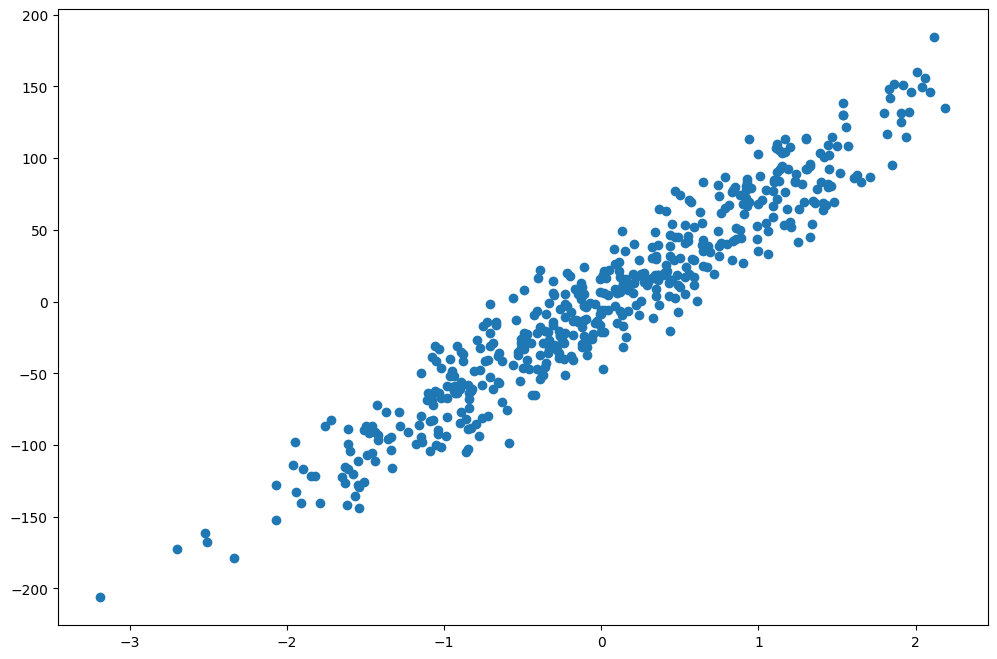

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X, y)

На основе визуального анализа делаем вывод, что распределение очень напоминает линейное! Поэтому пробуем аппроксимировать данное распределение прямой $y=k*x+b$. Процесс обучения нашей модели сводится к вычислению коэффициентов $k$ и $b$.

Обучение будем реализовывать на основе алгоритма градиентного спуска с некоторой скоростью $alpha$

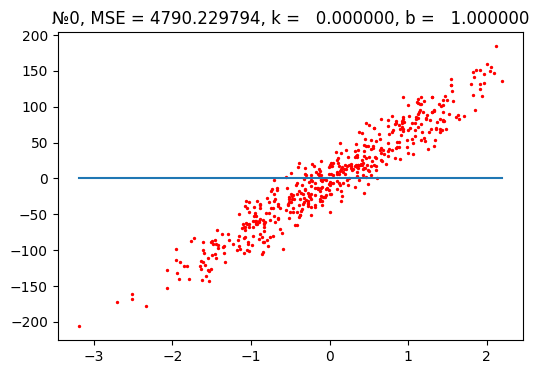

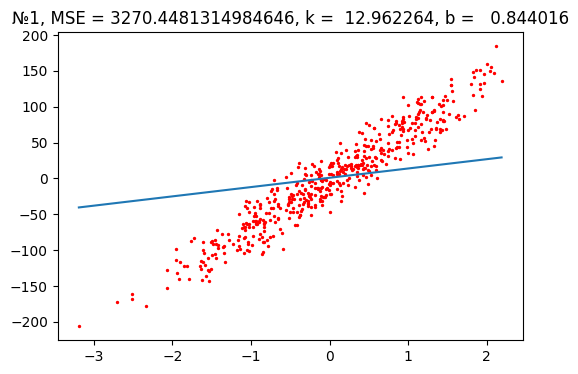

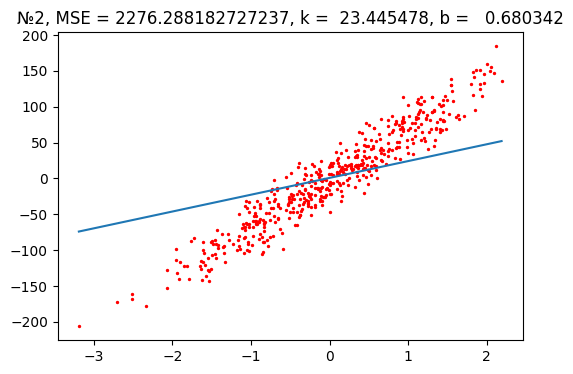

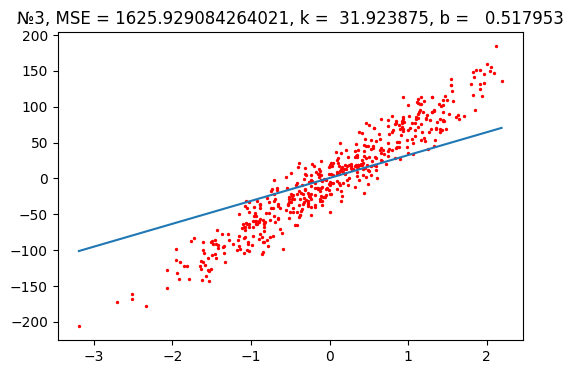

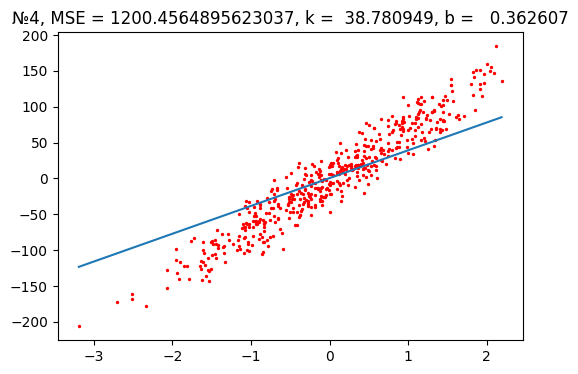

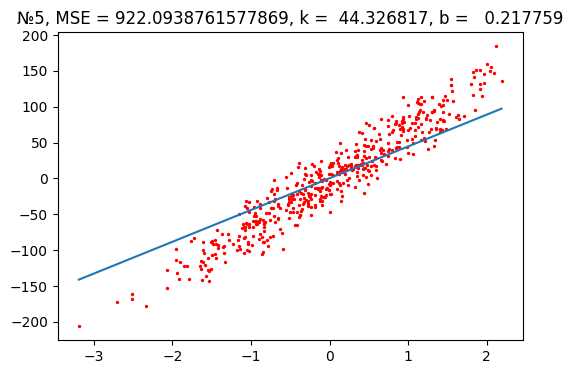

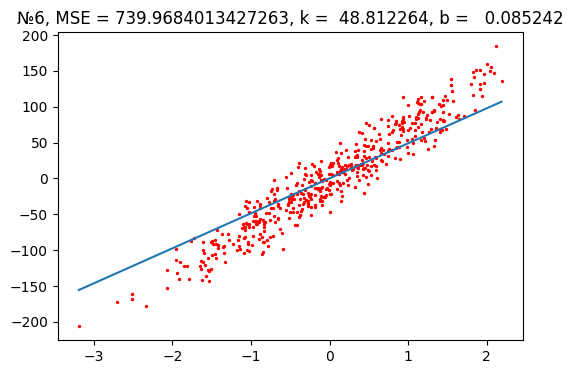

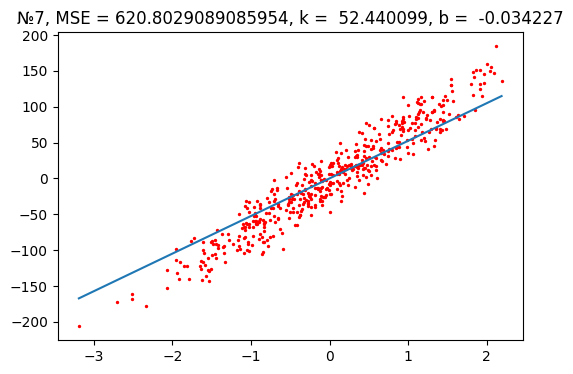

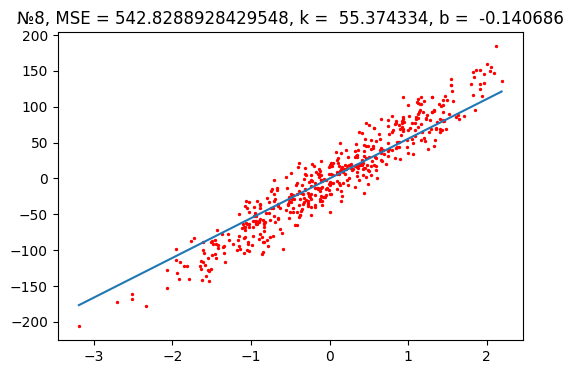

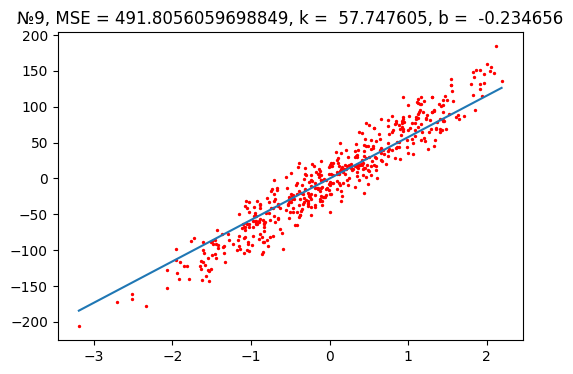

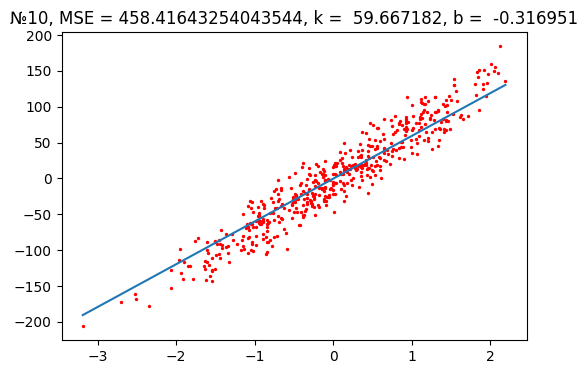

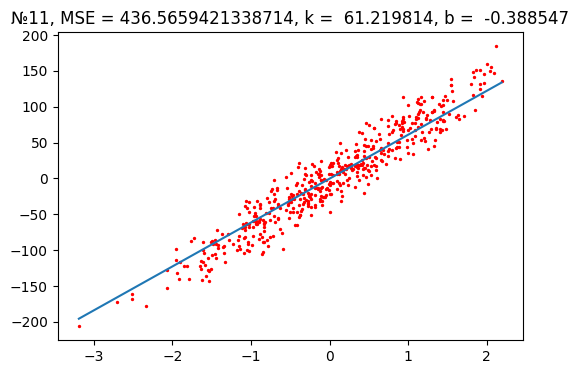

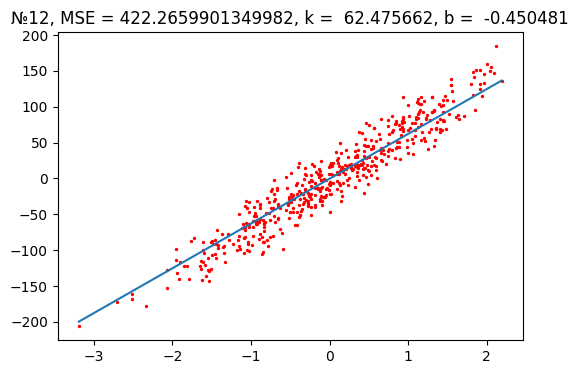

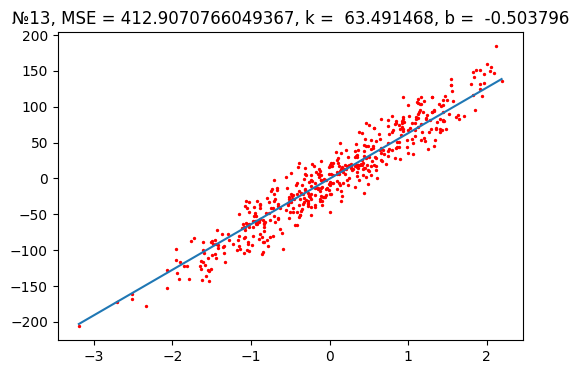

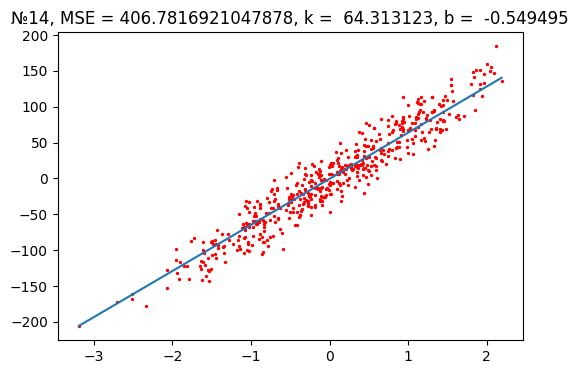

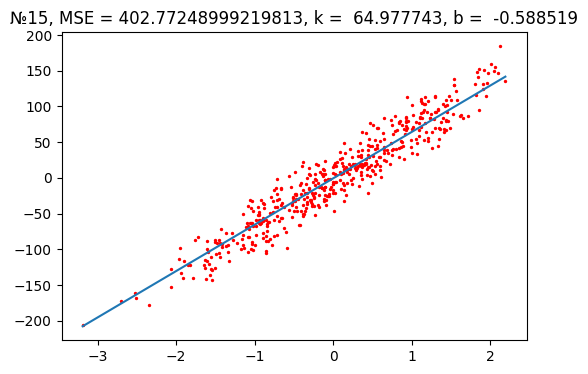

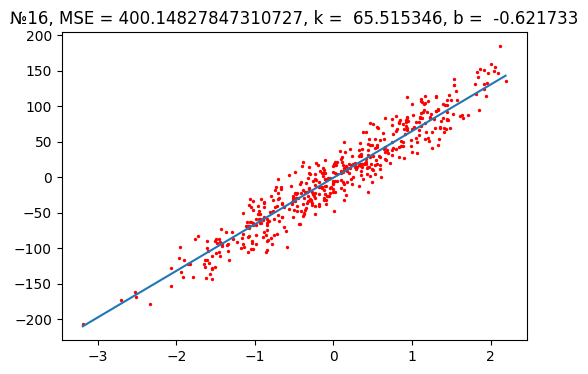

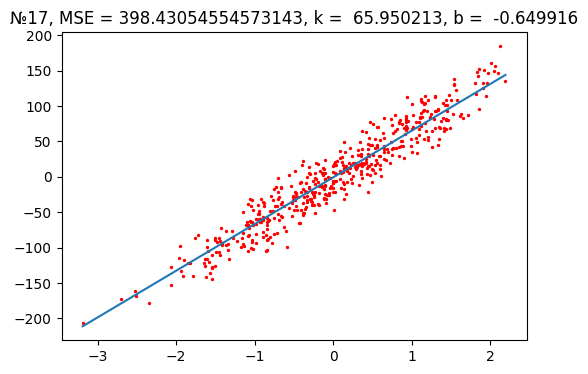

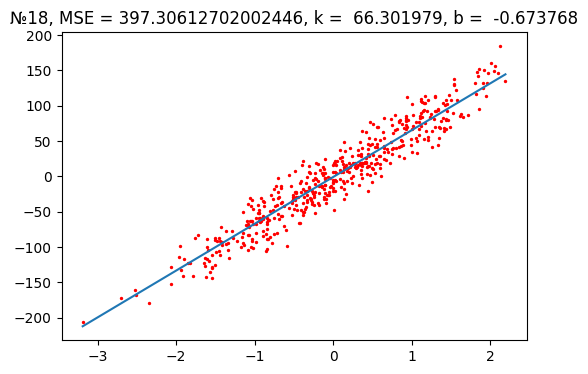

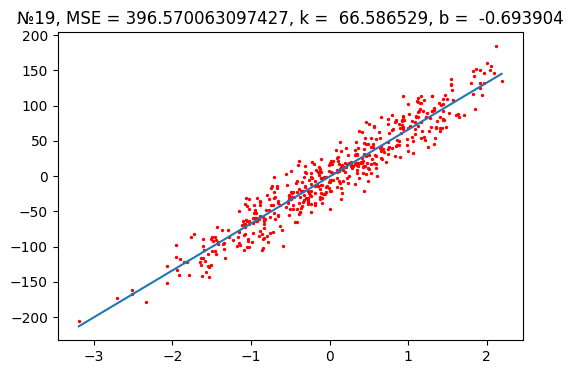

In [ ]:
# Инициализируем начальные значения коэффициентов для прямой
k, b = 0.0, 1.0
# диапазон X:
xmin, xmax = min(X), max(X)
# Скорость обучения
alpha = 0.1
# количество итераций обучения:
N = 20
for i in range(N):
  # вычисляем фактическое значение y_pred на основе эмпирического x
  y_pred = k*X + b
  # вычисляем среднеквадратичное отклонение (MSE)
  MSE = np.sum( (y - y_pred)**2 ) / y.shape[0]
  # построим график
  plt.figure(figsize=(6,4))
  plt.scatter(X, y, color='red', s=2)
  plt.plot([xmin, xmax], [k*xmin+b, k*xmax+b])
  plt.title(f'№{i}, MSE = {MSE}, k = {k:10f}, b = {b:10f}' )
  plt.show()
  # вычисляем градиенты ошибок
  gk = - ( 2 * np.dot(X.T, (y - y_pred))) / y.shape[0]
  gb = - 2 * np.sum(y - y_pred) / y.shape[0]
  # корректируем веса модели на основе ошибки и скорости обучения
  k = float(k - alpha * gk)
  b = b - alpha * gb


MSE = 396.570063097427, k =  66.816708, b =  -0.710867


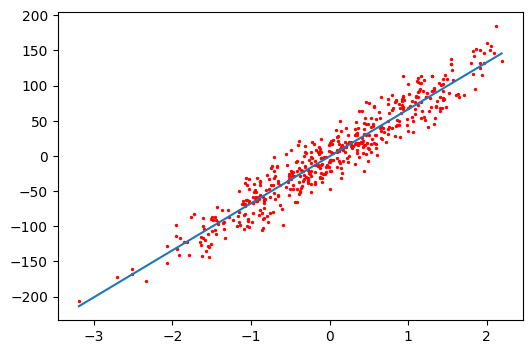

In [ ]:
# Проверяем полученную модель:
print(f'MSE = {MSE}, k = {k:10f}, b = {b:10f}')
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='red', s=2)
x0 = X.min()
x1 = X.max()
plt.plot([x0, x1], [k*x0+b, k*x1+b])
plt.show()

Контрольные вопросы

1. Действительно ли алгоритмы могут обучаться? В чем заключается процесс
обучения?
Алгоритмы могут обучаться. Это называется машинным обучением, и оно основано на том, что алгоритмы анализируют данные и находят закономерности, чтобы улучшить свою производительность в будущем.
Алгоритм пытается найти закономерности и создать модель, которая может предсказывать результаты для новых данных.
2. Что такое модель линейной регрессии?
Модель линейной регрессии — это статистический инструмент, который используется для предсказания значений зависимой переменной (то есть значения, которое мы хотим предсказать) на основе значений одной или нескольких независимых переменных (то есть переменных, которые мы используем для предсказания).
3. Каким образом производится подбор параметров модели в процессе
градиентного спуска?
Вычисляется градиент функции потерь по отношению к каждому параметру.
     Параметры модели обновляются, двигаясь в направлении, противоположном градиенту (с учетом скорости обучения).
     Повторять шаги 2-3, пока не будет достигнута остановка (например, если изменения в функции потерь станут меньше заданного порога).
4. Что такое темп обучения? Как влияет данный гиперпараметр на процесс
обучения?
Темп обучения (learning rate) — это один из самых важных гиперпараметров в машинном обучении, который определяет, насколько быстро модель адаптируется к данным во время обучения.  Он представляет собой шаг, который модель делает при корректировке своих весов на каждом этапе оптимизации.
5. Перечислите основные типы диаграмм matplotlib и функции, которые
реализуют построение графиков данных типов.
Линейные plt.plot(), точечные  plt.scatter(), гистограммы plt.hist(), круговые plt.pie(), рассеивания  plt.scatter(), баровые  plt.bar()